# Image types

### 1. Black and white image:
    - 0-black and 1-white
    - here 0 and 1 are binary values
    - Binary image and Monochrome image
    
### 2. GrayScale image:
    - combination of black and white
    - 256 color combinations
    - 0-black 128-gray 255-white
    - 8 bit unit-8 type
    
### 3. color image:
    - are formed by cobinatiion of 3 color red,green abd blue
    - each one taking 8 bits for 256 colors
    - total with 24 bit repr and togrther makes 16 million colors
    
### 4. Synthetic image:
    - generated by computer 
    - using various no. of bit repr and lookup table

# Handwritten digit Recognition
- Artificial neural network accecpts only one dimensional data as a input
- we will train a neural network model on MNIST handwritten digit dataset
- we have 60000 training images 10000 test imageseach of image is labelled
- each image is resized to 28/28
- Regression / binary input has 1 output
- multiclass input has no. of output neuron = no. of classes
- loss funstion: binary_classEntropy, categorical_classEntropy
- classification matrix: accuracy, precishion, recall, f1_score
- optimizer: SGD, adam

In [11]:
# simple CNN for the MNIST dataset

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# id array, without extracting any features, take whole image and covert to 1 dimension

In [12]:
# load data
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 32s 3us/step


In [13]:
# x_train training set with 60000 images
# x_test test set 10000 images
# y_train training set labels for training images
# y_test test set image lables

y_train[545]

8

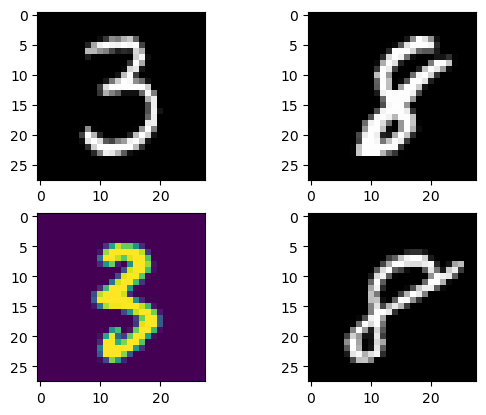

In [17]:
# plot 4 images as gray scale

plt.subplot(221)
plt.imshow(x_train[50], cmap = 'gray')
plt.subplot(222)
plt.imshow(x_train[545], cmap = 'gray')
plt.subplot(223)
plt.imshow(x_train[45000])  # without color map
plt.subplot(224)
plt.imshow(x_train[59999], cmap = plt.get_cmap('gray'))
plt.show()

In [18]:
y_train[545]

8

In [19]:
x_train.shape

(60000, 28, 28)

# Preprocessing step

In [31]:
xm_train = x_train.reshape((x_train.shape[0], 784)).astype('float32')
xm_test = x_test.reshape((x_test.shape[0], 784)).astype('float32')

# normalize inputs from 0.255 to 0.1
xm_train = xm_train / 255
xm_test = xm_test / 255

In [32]:
print(x_train.shape, x_test.shape)
print(xm_train, xm_test.shape)

(60000, 28, 28) (10000, 28, 28)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (10000, 784)


In [33]:
ym_train = to_categorical(y_train)  # converting to categories
ym_test = to_categorical(y_test)

In [34]:
print(y_train[20])
print(ym_train[20])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Model building

In [35]:
# create the object using sequential
# add input layer, add hidden layer, add the output layer
# choose the suitable activation function 
# add optimizer and matrices

In [36]:
DigitClassifier = Sequential()
DigitClassifier.add(Dense(256, input_dim = 784, activation = 'relu'))

# input layer with 784 inputs
# hidden layer with 128 neurons
# output layer with 10 outputs
DigitClassifier.add(Dense(10, activation='softmax'))
# compile model

DigitClassifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# since no. of classes more than 2 we use categorical crossentropy function for loss measurement
# adam: error minimizer(optimizer)
# accuracy,try to achieve better accuracy

DigitClassifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
DigitClassifier.fit(xm_train, ym_train, validation_data=(xm_test, ym_test), epochs = 5, batch_size = 200)

Epoch 1/5
300/300 [==============================] - 5s 9ms/step - loss: 0.3568 - accuracy: 0.9015 - val_loss: 0.1855 - val_accuracy: 0.9476
Epoch 2/5
300/300 [==============================] - 2s 8ms/step - loss: 0.1570 - accuracy: 0.9554 - val_loss: 0.1305 - val_accuracy: 0.9607
Epoch 3/5
300/300 [==============================] - 2s 8ms/step - loss: 0.1083 - accuracy: 0.9692 - val_loss: 0.1022 - val_accuracy: 0.9696
Epoch 4/5
300/300 [==============================] - 2s 8ms/step - loss: 0.0815 - accuracy: 0.9765 - val_loss: 0.0908 - val_accuracy: 0.9704
Epoch 5/5
300/300 [==============================] - 4s 13ms/step - loss: 0.0643 - accuracy: 0.9814 - val_loss: 0.0819 - val_accuracy: 0.9738


In [1]:
scores = DigitClassifier.evaluate(xm_test, ym_test) # test result
scores

NameError: name 'DigitClassifier' is not defined

In [2]:
print('loss =', scores[0], 'accuracy =', scores[1])

NameError: name 'scores' is not defined

1/1 [==============================] - 0s 175ms/step


array([[7.9919977e-07, 3.7044492e-10, 1.0234915e-04, 7.2360362e-09,
        9.9987781e-01, 1.4843362e-08, 6.1982860e-06, 6.1724404e-07,
        1.9085319e-06, 1.0290834e-05]], dtype=float32)

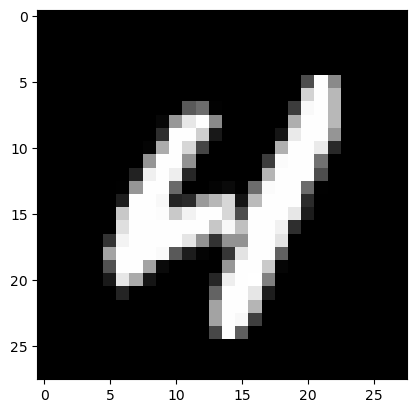

In [38]:
# single image test, select any image from test data
plt.imshow(x_test[770], cmap = plt.get_cmap('gray'))
r1 = DigitClassifier.predict(xm_test[770:771])
r1